In [38]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1) Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение минимум, максимум и различные квантили).


In [39]:
data = pd.read_csv("./california_housing_train.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
X = data.drop(columns=["median_house_value"])
y = data["median_house_value"]
rows_count = X.shape[0]
cols_count = X.shape[1]

means = data.mean(axis=0)
corrected_dispersions = np.sum(np.power(data - means, 2), axis=0) / (rows_count - 1)
standart_offsets = np.sqrt(corrected_dispersions)
mins = data.min(axis=0)
maxs = data.max(axis=0)

print("Общая статистика по датасету:")
print(data.describe())

quantiles = data.quantile([0.25, 0.5, 0.75])

bins_count = 1 + int(math.log(rows_count, 2))
data_from = X.join(y)
titles = data_from.columns

fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
    ax = fig.add_subplot(3, 3, i + 1)
    hist = ax.hist(data_from[column], bins=bins_count, edgecolor="black")

    ax.axvline(x=means.iloc[i], color="red", label="Mean")
    ax.axvline(x=means.iloc[i] - standart_offsets.iloc[i], color="orange", linestyle="--", label="±1σ")
    ax.axvline(x=means.iloc[i] + standart_offsets.iloc[i], color="orange", linestyle="--")

    ax.axvline(x=quantiles.loc[0.25, column], color="green", linestyle=":", label="25%")
    ax.axvline(x=quantiles.loc[0.5, column], color="blue", linestyle=":", label="50% (Median)")
    ax.axvline(x=quantiles.loc[0.75, column], color="purple", linestyle=":", label="75%")

    ax.set_title(titles[i], fontsize=14)
    ax.legend(fontsize=8)

fig.tight_layout()
plt.show()


Общая статистика по датасету:
          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.

2) Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

In [33]:
print("Количество пропусков в каждом столбце:")
print(data.isna().sum())

data = data.fillna(data.mean(numeric_only=True))

for col in data.select_dtypes(include=["object"]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

data = pd.get_dummies(data, drop_first=True)

scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=["number"]).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

print("Предварительная обработка завершена!")
print(f"Размер обработанного набора данных: {data.shape}")


Количество пропусков в каждом столбце:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Предварительная обработка завершена!
Размер обработанного набора данных: (17000, 9)


В результате предварительной обработки был получен очищенный и нормализованный набор данных размером 17000×9, полностью готовый для проведения дальнейшего анализа и построения моделей.
Данные не содержат пропусков и находятся в едином масштабе, что обеспечивает корректность и устойчивость последующих вычислений.

3) Разделите данные на обучающий и тестовый наборы данных.

In [34]:
train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data.drop(columns=["median_house_value"])
y_train = train_data["median_house_value"]

X_test = test_data.drop(columns=["median_house_value"])
y_test = test_data["median_house_value"]

print(f"Размер обучающего набора: {X_train.shape[0]} объектов")
print(f"Размер тестового набора: {X_test.shape[0]} объектов")


Размер обучающего набора: 13600 объектов
Размер тестового набора: 3400 объектов


4) Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.


In [35]:
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train.values])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])

XTX_inv = np.linalg.inv(X_train_bias.T @ X_train_bias)
w = XTX_inv @ X_train_bias.T @ y_train.values

y_pred_train = X_train_bias @ w
y_pred_test = X_test_bias @ w

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

mse_train = mse(y_train, y_pred_train)
mse_test = mse(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

coef_names = ["bias"] + list(X_train.columns)
print("Коэффициенты линейной регрессии:")
print(pd.Series(w, index=coef_names))

print("Качество модели:")
print(f"На обучающей выборке: R² = {r2_train:.4f}, MSE = {mse_train:.2f}")
print(f"На тестовой выборке:  R² = {r2_test:.4f}, MSE = {mse_test:.2f}")


Коэффициенты линейной регрессии:
bias                 -0.016095
longitude            -0.695383
latitude             -0.756122
housing_median_age    0.106732
total_rooms          -0.157117
total_bedrooms        0.427739
population           -0.352381
households            0.111788
median_income         0.656424
dtype: float64
Качество модели:
На обучающей выборке: R² = 0.6203, MSE = 0.35
На тестовой выборке:  R² = 0.6558, MSE = 0.42


5) Постройте три модели с различными наборами признаков.

In [36]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

def linear_regression(X, y):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X.values])
    w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y.values
    y_pred = X_bias @ w
    return w, y_pred

feature_sets = {
    "Model_1": ["median_income"],
    "Model_2": ["median_income", "housing_median_age", "total_rooms"],
    "Model_3": ["median_income", "housing_median_age", "total_rooms", "total_bedrooms",
                "population", "households", "longitude", "latitude"]
}

results = []

for name, features in feature_sets.items():
    X_train = train_data[features]
    X_test = test_data[features]

    w, y_pred_train = linear_regression(X_train, y_train)

    X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test.values])
    y_pred_test = X_test_bias @ w

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    results.append({
        "Model": name,
        "Features": features,
        "R2_train": r2_train,
        "R2_test": r2_test,
        "Coefficients": w
    })

for res in results:
    print(f"\n=== {res['Model']} ===")
    print(f"Признаки: {res['Features']}")
    print(f"R² на обучающей выборке: {res['R2_train']:.4f}")
    print(f"R² на тестовой выборке:    {res['R2_test']:.4f}")
    print(f"Коэффициенты: {res['Coefficients']}")



=== Model_1 ===
Признаки: ['median_income']
R² на обучающей выборке: 0.4690
R² на тестовой выборке:    0.4309
Коэффициенты: [-0.05865238  0.67300672]

=== Model_2 ===
Признаки: ['median_income', 'housing_median_age', 'total_rooms']
R² на обучающей выборке: 0.4944
R² на тестовой выборке:    0.5192
Коэффициенты: [-0.04183095  0.68720195  0.17143792  0.05082007]

=== Model_3 ===
Признаки: ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude']
R² на обучающей выборке: 0.6203
R² на тестовой выборке:    0.6558
Коэффициенты: [-0.01609522  0.65642393  0.10673204 -0.15711715  0.42773916 -0.35238078
  0.1117884  -0.69538298 -0.75612169]


=== Оценка модели ===
R² (train): 0.620347
R² (test):  0.655967
MSE (train): 0.35
MSE (test):  0.42


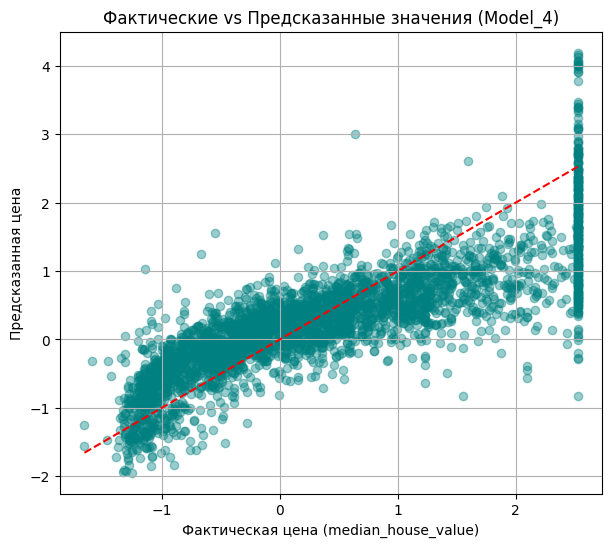


=== Важность признаков ===
latitude                   -0.667700
median_income               0.637684
longitude                  -0.545912
total_bedrooms              0.443800
population                 -0.369652
total_rooms                -0.164296
households                  0.115517
housing_median_age          0.102609
population_per_household    0.007572
rooms_per_household        -0.002153
dtype: float64


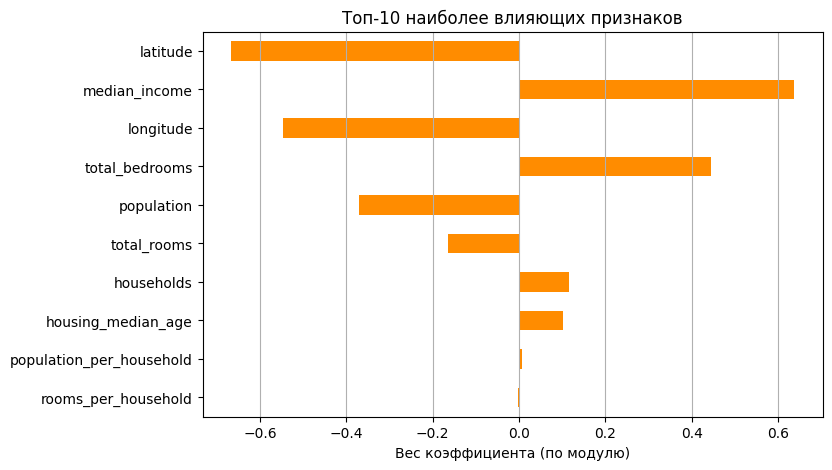

In [37]:
data = data.copy()
data.loc[:, "rooms_per_household"] = data["total_rooms"] / data["households"]
data.loc[:, "bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data.loc[:, "population_per_household"] = data["population"] / data["households"]

train_ratio = 0.8
train_size = int(len(data) * train_ratio)

train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

features = [c for c in data.columns if c != "median_house_value"]
X_train = train_data[features]
y_train = train_data["median_house_value"]
X_test = test_data[features]
y_test = test_data["median_house_value"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("=== Оценка модели ===")
print(f"R² (train): {r2_train:.6f}")
print(f"R² (test):  {r2_test:.6f}")
print(f"MSE (train): {mse_train:.2f}")
print(f"MSE (test):  {mse_test:.2f}")

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.title("Фактические vs Предсказанные значения (Model_4)")
plt.xlabel("Фактическая цена (median_house_value)")
plt.ylabel("Предсказанная цена")
plt.grid(True)
plt.show()

importance = pd.Series(model.coef_, index=features).sort_values(key=abs, ascending=False)
print("\n=== Важность признаков ===")
print(importance.head(10))

plt.figure(figsize=(8, 5))
importance.head(10).plot(kind='barh', color='darkorange')
plt.title("Топ-10 наиболее влияющих признаков")
plt.xlabel("Вес коэффициента")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()
